## <font color='blue'> Chargement des modules & données

In [521]:
import random
import re
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_validate
from sklearn.compose import make_column_selector, make_column_transformer , ColumnTransformer 
from category_encoders import *
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import linear_model , metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score , davies_bouldin_score , silhouette_score


import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

from scipy.cluster.vq import kmeans,vq
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
import tensorflow as tf
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
df = pd.read_csv('Dataset/flipkart_com-ecommerce_sample_1050.csv')

In [427]:
df[['product_category_tree','description','image']].head()

product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

# Text Processing

## <font color='blue'> Analyse Pre-Exploratoire

###  Valeur Manquantes & duplication

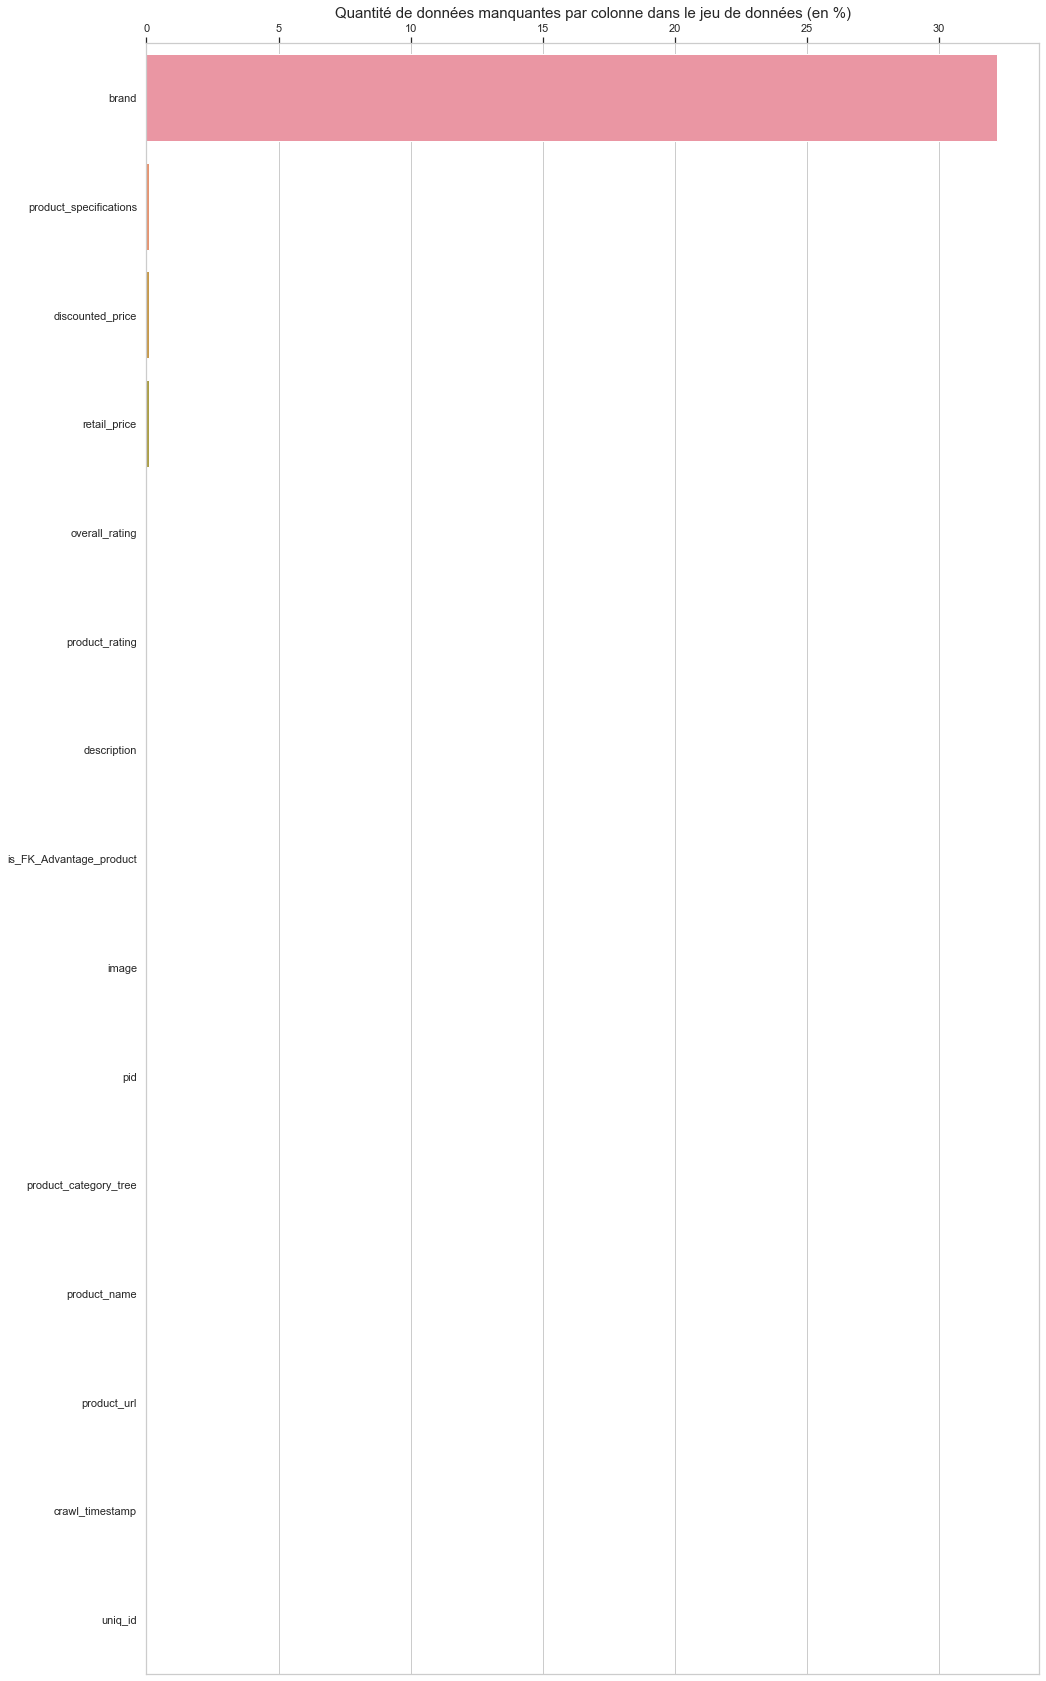

In [4]:
proportion_nan = df.isna().sum().divide(df.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [5]:
df2 = df.copy()#.dropna()
df2['brand'] = df2['brand'].fillna('')

In [6]:
df2.shape

(1050, 15)

In [7]:
df3=df2.copy()[['uniq_id','product_name','product_category_tree','description','brand']]

In [8]:
df3

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree  \
0     ["Home Furnishing >> Curtains & Accessories >>...   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
...                                                 ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   

                                            description                  brand  
0     Key Features of Elegance Polyester Multicolor ...               Elegance  
1     Specifications of Sathiyas Cotton Bath Towel (...               Sathiyas  
2     Key Features of Eurospa Cotton Terry Face Towe...                Eurospa  
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  SANTOSH ROYAL FASHION  
4     Key Features of Jaipur Print Cotton Floral Kin...           Jaipur Print  
...                                                 ...                    ...  
1045  Oren Empower Extra Large Self Adhesive Sticker...           Oren Empower  
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...             Wallmantra  
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...               Uberlyfe  
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...             Wallmantra  
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...               Uberlyfe  

[1050 rows x 5 columns]

In [9]:
df3.duplicated(subset=['uniq_id']).any()

False

###  Formatage colonne Categorie

In [10]:
#Traitement des catégories
def split_categories(category, level):
    '''FOnction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]
def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)
def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [11]:
df4 = detail_categories(df3.copy())

In [433]:
df3['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [435]:
df4[['cat_lvl_1','cat_lvl_2','cat_lvl_3']]

cat_lvl_1               cat_lvl_2         cat_lvl_3
0     Home Furnishing  Curtains & Accessories          Curtains
1           Baby Care        Baby Bath & Skin  Baby Bath Towels
2           Baby Care        Baby Bath & Skin  Baby Bath Towels
3     Home Furnishing               Bed Linen         Bedsheets
4     Home Furnishing               Bed Linen         Bedsheets
...               ...                     ...               ...
1045        Baby Care       Baby & Kids Gifts          Stickers
1046        Baby Care       Baby & Kids Gifts          Stickers
1047        Baby Care       Baby & Kids Gifts          Stickers
1048        Baby Care       Baby & Kids Gifts          Stickers
1049        Baby Care       Baby & Kids Gifts          Stickers

[1050 rows x 3 columns]

<AxesSubplot:>

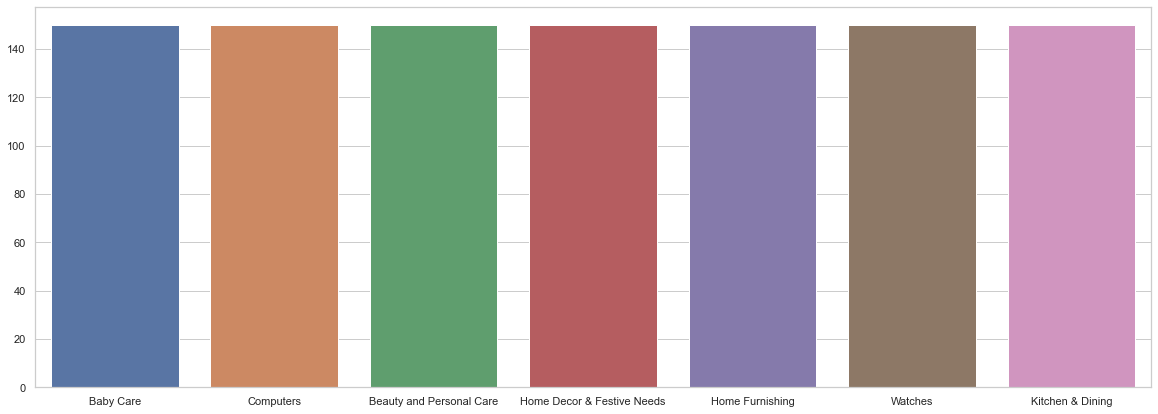

In [436]:
plt.figure(figsize=(20,7))
sns.barplot(y=df4['cat_lvl_1'].value_counts().values,x=df4['cat_lvl_1'].value_counts().index)

In [14]:
df4['cat_lvl_1'].value_counts()

Baby Care                     150
Computers                     150
Beauty and Personal Care      150
Home Decor & Festive Needs    150
Home Furnishing               150
Watches                       150
Kitchen & Dining              150
Name: cat_lvl_1, dtype: int64

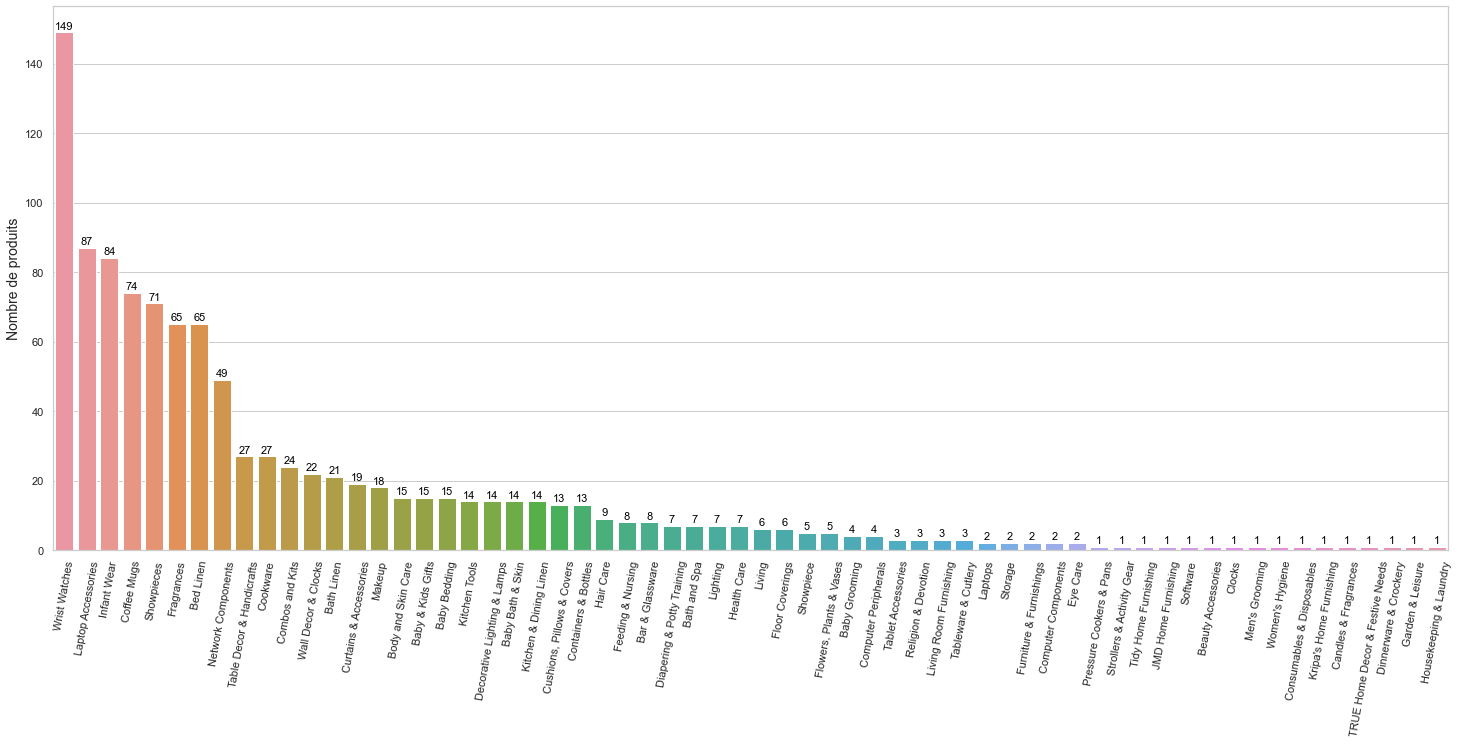

In [15]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=80)

sns.barplot(y=df4['cat_lvl_2'].value_counts().values,x=df4['cat_lvl_2'].value_counts().index)

plt.ylabel("Nombre de produits", size=14)

for i, v in enumerate(df4['cat_lvl_2'].value_counts().values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

In [16]:
df5 = df4.copy()[['uniq_id','product_name','description','cat_lvl_1','cat_lvl_2']]

###  Tokenisation et leminisation

In [17]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [18]:
df5['sentence_bow'] = df5['description'].apply(lambda x : transform_bow_fct(x))
df5['sentence_bow_lem'] = df5['description'].apply(lambda x : transform_bow_lem_fct(x))
df5['sentence_dl'] = df5['description'].apply(lambda x : transform_dl_fct(x))
df5.shape                           

(1050, 8)

In [437]:
df5

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                            description        cat_lvl_1  \
0     Key Features of Elegance Polyester Multicolor ...  Home Furnishing   
1     Specifications of Sathiyas Cotton Bath Towel (...        Baby Care   
2     Key Features of Eurospa Cotton Terry Face Towe...        Baby Care   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  Home Furnishing   
4     Key Features of Jaipur Print Cotton Floral Kin...  Home Furnishing   
...                                                 ...              ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...        Baby Care   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...        Baby Care   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...        Baby Care   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...        Baby Care   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...        Baby Care   

                   cat_lvl_2  \
0     Curtains & Accessories   
1           Baby Bath & Skin   
2           Baby Bath & Skin   
3                  Bed Linen   
4                  Bed Linen   
...                      ...   
1045       Baby & Kids Gifts   
1046       Baby & Kids Gifts   
1047       Baby & Kids Gifts   
1048       Baby & Kids Gifts   
1049       Baby & Kids Gifts   

                                           sentence_bow  \
0     key features elegance polyester multicolor abs...   
1     specifications sathiyas cotton bath towel bath...   
2     key features eurospa cotton terry face towel s...   
3     key features santosh royal fashion cotton prin...   
4     key features jaipur print cotton floral king s...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyfe large vinyl sticker rs.595 online...   

                                       sentence_bow_lem  \
0     key feature elegance polyester multicolor abst...   
1     specification sathiyas cotton bath towel bath ...   
2     key feature eurospa cotton terry face towel se...   
3     key feature santosh royal fashion cotton print...   
4     key feature jaipur print cotton floral king si...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyfe large vinyl sticker rs.595 online...   

                                            sentence_dl  
0     key features of elegance polyester mu

###   WordCloud

(-0.5, 799.5, 499.5, -0.5)

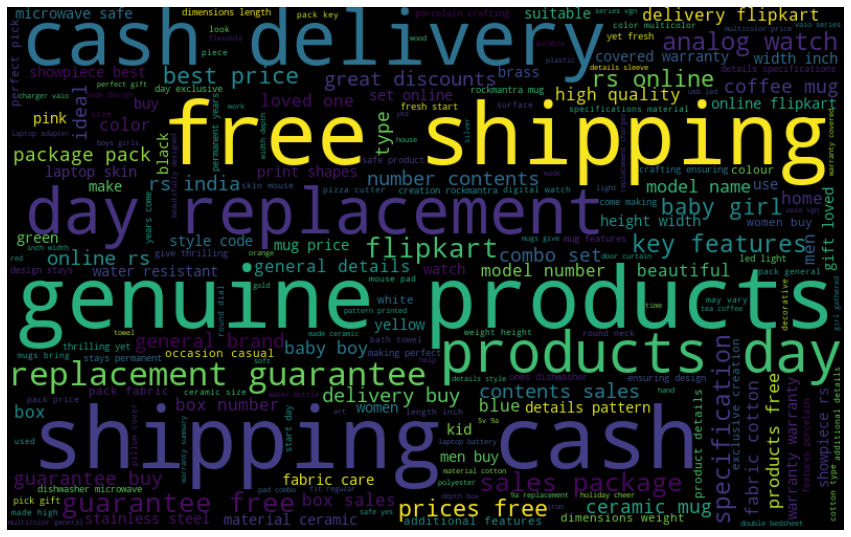

In [19]:
all_des = ' '.join([text for text in df5["sentence_bow"]])
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_des)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [20]:
def plot_count_word(df,cat):
    
    vect= CountVectorizer()
    vect.fit(df[df['cat_lvl_1']==cat]['sentence_bow'])
    token =  pd.Series(vect.vocabulary_).sort_values(ascending=False)
    list_tok = list(token.index)
    list_tok2 = [w for w in list_tok if w not in stop_w]
    token = token[list_tok2].sort_values(ascending=False)
    
    plt.figure(figsize=(20,3))
    titre = cat
    plt.title(titre)
    sns.barplot(y=token[:25].values,x=token[:25].index)
    
    return 

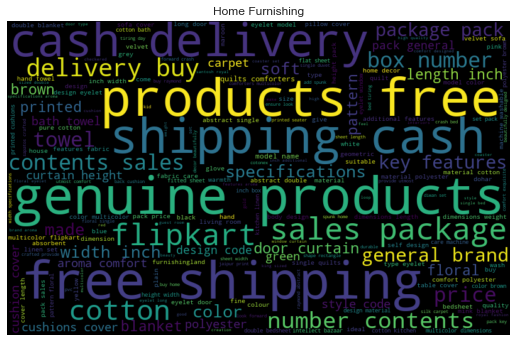

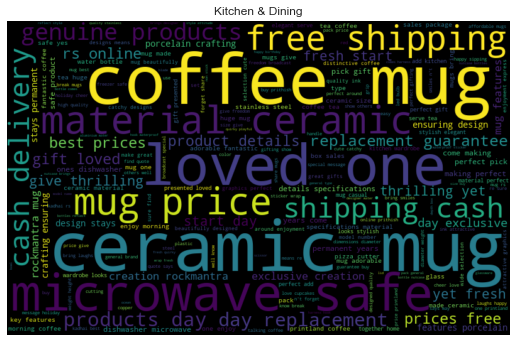

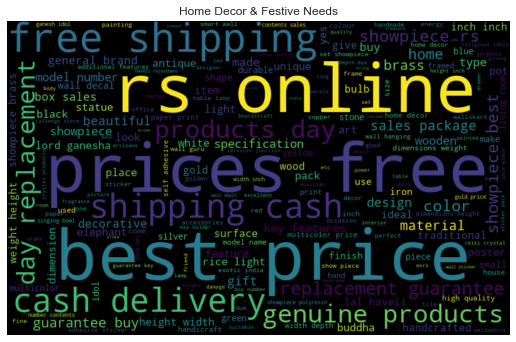

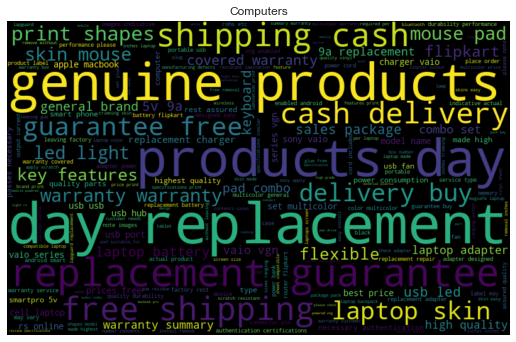

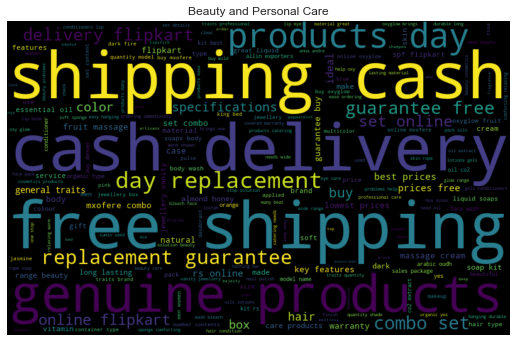

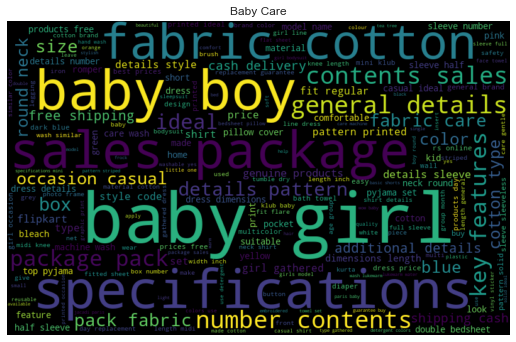

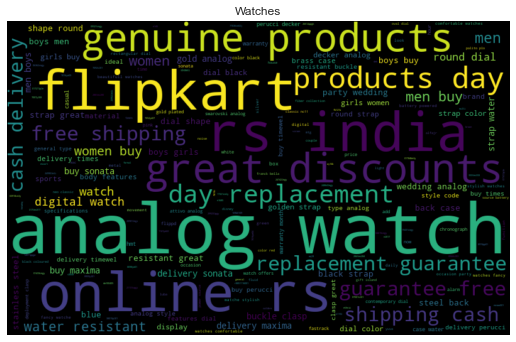

In [21]:
for cat in set(df5['cat_lvl_1']):
    data = df5[df5['cat_lvl_1']==cat]['sentence_bow']
    all_des = ' '.join([text for text in data])
    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_des)
    plt.figure(figsize=(9, 9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(cat)


## <font color='blue'> Modélisation

In [22]:
l_cat = list(set(df5['cat_lvl_1']))
y_cat_num = [(1+l_cat.index(df5.iloc[i]['cat_lvl_1'])) for i in range(len(df5))]

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df5, y_cat_num, test_size=0.20, random_state=42)

###  Fonction commune

In [701]:
def ARI_fct2(features,true_lab) :
    num_labels=len(l_cat)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    X_tsne2=pd.DataFrame(X_tsne.copy(),columns=['DIM1','DIM2'])
    X_tsne2['lab_reel'] = true_lab
    X_tsne2['lab_pred'] = cls.labels_
    X_tsne2['change'] = np.zeros((len(X_tsne2),1))
    
    dict_lab=dict()
    
    for i in set(cls.labels_) :
        
        lab_change = X_tsne2[X_tsne2['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index[0]

        if lab_change in dict_lab.values():
            n = X_tsne2[X_tsne2['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index
            for j in range(1,len(n)):
                lab_change = X_tsne2[X_tsne2['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index[j]
                if lab_change not in dict_lab.values() :
                    break 

        dict_lab[i]=lab_change
        
    for i in dict_lab.keys() :
        X_tsne2.loc[X_tsne2['lab_pred'] ==  i, 'change'] =dict_lab[i]
        
    return X_tsne2, X_tsne2['change']


def TSNE_visu_fct2(X_tsne, true_lab, labels) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne['DIM1'],X_tsne['DIM2'], c=true_lab, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des biens par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne['DIM1'],X_tsne['DIM2'], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des biens par clusters')
    
    plt.show()
    return

###  Bag of Word & TD-idf

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

cv_fit = cvect.fit(df5['sentence_bow_lem'])
ctf_fit = ctf.fit(df5['sentence_bow_lem'])

cv_transform = cvect.transform(df5['sentence_bow_lem'])  
ctf_transform = ctf.transform(df5['sentence_bow_lem'])

### Word2Vec

In [26]:
#!pip install gensim==4.0

In [27]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

C:\Users\Agint\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [28]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df5['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [29]:
print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(vector_size=w2v_size,window=w2v_window,min_count=w2v_min_count,workers=1) 
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [30]:
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


In [31]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [32]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [33]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

###  BERT

In [34]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [35]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


In [36]:
# Fonction de préparation des sentences
import time 
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [37]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df5['sentence_dl'].to_list()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\Agint/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [38]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\Agint/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

1/1 [==============================] - 1s 613ms/step
temps traitement :  75.0


###  USE

In [39]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [40]:
print(tf.__version__)
print(tensorflow.__version__)

2.9.1
2.9.1


In [41]:
import tensorflow_hub as hub

In [42]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [43]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [44]:
batch_size = 10
sentences = df5['sentence_dl'].to_list()

In [45]:
features_USE = feature_USE_fct(sentences, batch_size)

## <font color='blue'> Comparaison des modèles

CountVectorizer : 
-----------------


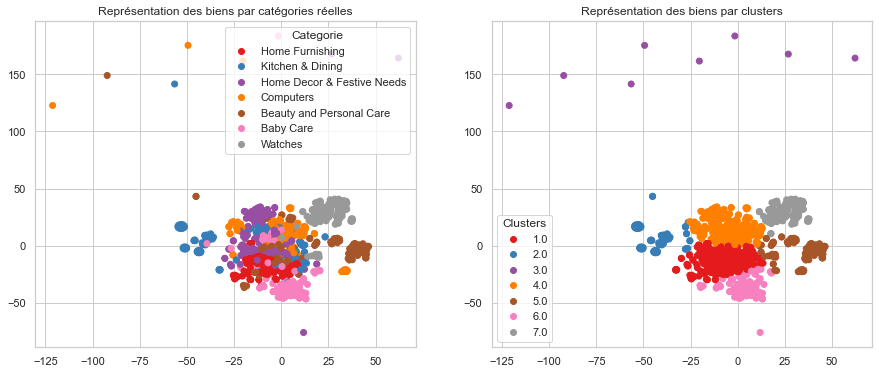

In [46]:
print("CountVectorizer : ")
print("-----------------")
X_tsne_CV, labels_CV = ARI_fct2(cv_transform,y_cat_num)   
TSNE_visu_fct2(X_tsne_CV, y_cat_num, labels_CV)

Tf-idf : 
--------


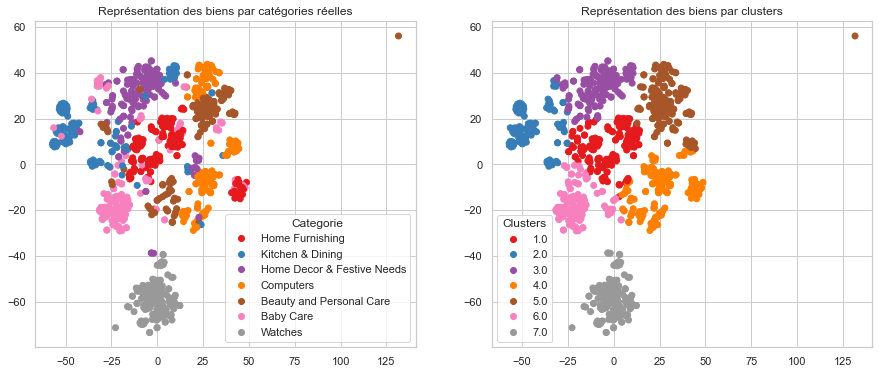

In [47]:
print("Tf-idf : ")
print("--------")
X_tsne_Tf, labels_Tf = ARI_fct2(ctf_transform,y_cat_num)
TSNE_visu_fct2(X_tsne_Tf, y_cat_num, labels_Tf)

word2vec
--------


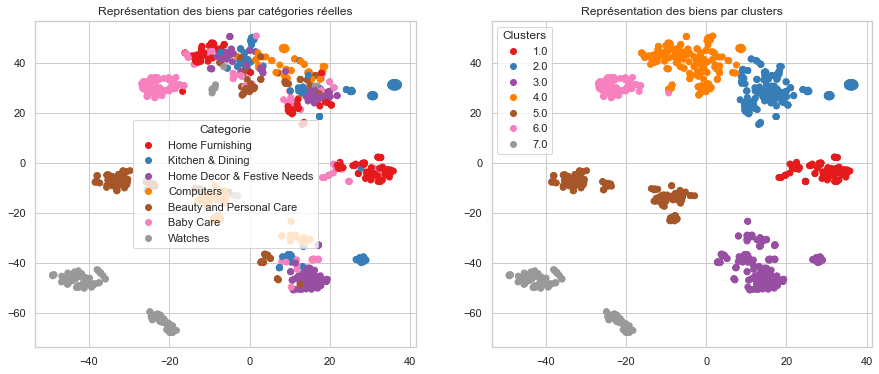

In [48]:
print("word2vec")
print("--------")
X_tsne_W2V, labels_W2V = ARI_fct2(embeddings,y_cat_num)
TSNE_visu_fct2(X_tsne_W2V, y_cat_num, labels_W2V)

BERT
--------


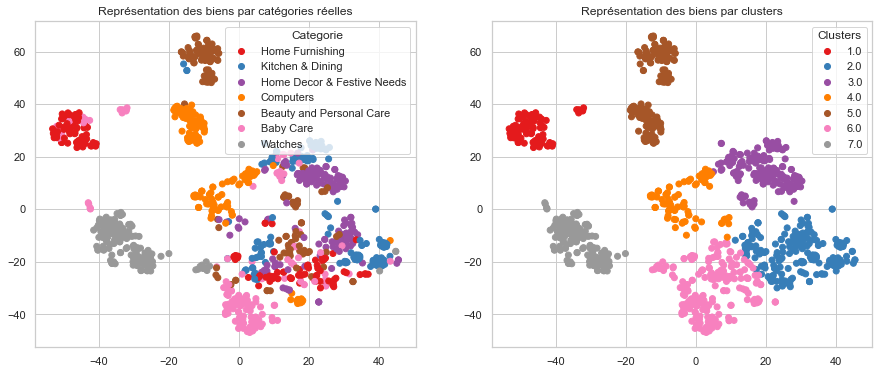

In [49]:
print("BERT")
print("--------")
X_tsne_Bt, labels_Bt = ARI_fct2(features_bert,y_cat_num)
TSNE_visu_fct2(X_tsne_Bt, y_cat_num, labels_Bt)

USE
--------


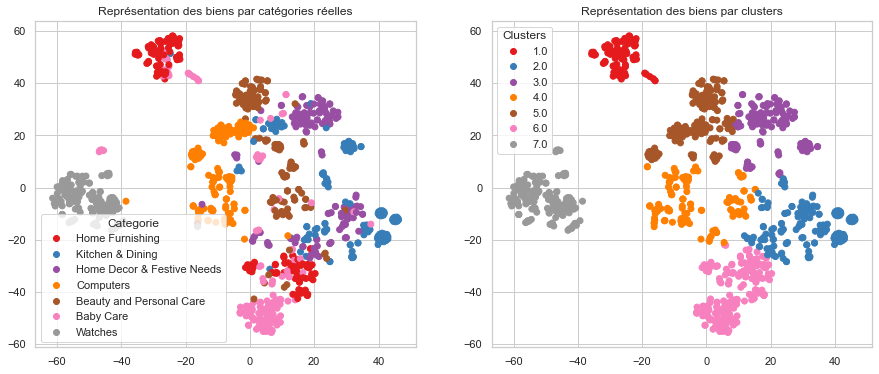

In [50]:
print("USE")
print("--------")
X_tsne_U, labels_U = ARI_fct2(features_USE,y_cat_num)
TSNE_visu_fct2(X_tsne_U, y_cat_num, labels_U)

In [384]:
df_comparaison = pd.DataFrame(index=['accurency','ari'],columns=['CV','TF-IDF','W2V','BERT','USE'])

In [55]:
print('ARI POUR CountVectorizer : ',adjusted_rand_score(y_cat_num, labels_CV))
print('ACCURENCY POUR CountVectorizer : ',accuracy_score(y_cat_num, labels_CV),'\n')

print('ARI POUR Tf-IDF : ',adjusted_rand_score(y_cat_num, labels_Tf))
print('ACCURENCY POUR Tf-IDF : ',accuracy_score(y_cat_num, labels_Tf),'\n')

print('ARI POUR W2V : ',adjusted_rand_score( y_cat_num, labels_W2V))
print('ACCURENCY POUR W2V : ',accuracy_score( y_cat_num, labels_W2V),'\n')

print('ARI POUR BERT : ',adjusted_rand_score(y_cat_num, labels_Bt))
print('ACCURENCY POUR BERT : ',accuracy_score(y_cat_num, labels_Bt),'\n')

print('ARI POUR USE : ',adjusted_rand_score(y_cat_num, labels_U))
print('ACCURENCY POUR USE : ',accuracy_score(y_cat_num, labels_U),'\n')

ARI POUR CountVectorizer :  0.36782388793485343
ACCURENCY POUR CountVectorizer :  0.62 

ARI POUR Tf-IDF :  0.5112647646747761
ACCURENCY POUR Tf-IDF :  0.7219047619047619 

ARI POUR W2V :  0.2771105491366183
ACCURENCY POUR W2V :  0.49714285714285716 

ARI POUR BERT :  0.3265470009849702
ACCURENCY POUR BERT :  0.5695238095238095 

ARI POUR USE :  0.4227821928382936
ACCURENCY POUR USE :  0.6133333333333333 



In [385]:
df_comparaison['CV']['ari']=adjusted_rand_score(y_cat_num, labels_CV)
df_comparaison['CV']['accurency']=accuracy_score(y_cat_num, labels_CV)

df_comparaison['TF-IDF']['ari']=adjusted_rand_score(y_cat_num, labels_Tf)
df_comparaison['TF-IDF']['accurency']=accuracy_score(y_cat_num, labels_Tf)

df_comparaison['W2V']['ari']=adjusted_rand_score( y_cat_num, labels_W2V)
df_comparaison['W2V']['accurency']=accuracy_score( y_cat_num, labels_W2V)

df_comparaison['BERT']['ari']=adjusted_rand_score(y_cat_num, labels_Bt)
df_comparaison['BERT']['accurency']=accuracy_score(y_cat_num, labels_Bt)

df_comparaison['USE']['ari']=adjusted_rand_score(y_cat_num, labels_U)
df_comparaison['USE']['accurency']=accuracy_score(y_cat_num, labels_U)

CV    TF-IDF       W2V      BERT       USE
accurency      0.62  0.721905  0.497143  0.569524  0.613333
ari        0.367824  0.511265  0.277111  0.326547  0.422782

**Pour la suite on va utiliser Use et Tf-IDF qui nous donne les meilleurs resultats**

In [204]:
df_best_textpro = pd.DataFrame(index=df5.index,columns=['categorie','num_categorie','USE','TF-IDF'])
df_best_textpro['categorie'] = df5['cat_lvl_1'].copy()
df_best_textpro['num_categorie'] = y_cat_num

In [205]:
for i in range(len(df_best_textpro)):
    df_best_textpro['USE'][i] = features_USE[i]
    df_best_textpro['TF-IDF'][i] = ctf_transform[i]

# Image Processing

## <font color='blue'> Pre-traitement

In [56]:
df_image=df2.copy()[['uniq_id','image','product_category_tree']]

In [57]:
df_image2 = detail_categories(df_image.copy())

In [58]:
df_image2

uniq_id                                 image  \
0     55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                ...                                   ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44  f2f027ad6a6df617c9f125173da71e44.jpg   

            cat_lvl_1               cat_lvl_2         cat_lvl_3  
0     Home Furnishing  Curtains & Accessories          Curtains  
1           Baby Care        Baby Bath & Skin  Baby Bath Towels  
2           Baby Care        Baby Bath & Skin  Baby Bath Towels  
3     Home Furnishing               Bed Linen         Bedsheets  
4     Home Furnishing               Bed Linen         Bedsheets  
...               ...                     ...               ...  
1045        Baby Care       Baby & Kids Gifts          Stickers  
1046        Baby Care       Baby & Kids Gifts          Stickers  
1047        Baby Care       Baby & Kids Gifts          Stickers  
1048        Baby Care       Baby & Kids Gifts          Stickers  
1049        Baby Care       Baby & Kids Gifts          Stickers  

[1050 rows x 5 columns]

In [59]:
from PIL import Image, ImageOps, ImageFilter
import os

In [60]:
def path_image(image):
    
    image = "Dataset/Images/" + image
    
    return image

In [61]:
df_image2["image"] = df_image2["image"].apply(path_image)

In [62]:
df_image2

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                                  image        cat_lvl_1  \
0     Dataset/Images/55b85ea15a1536d46b7190ad6fff8ce...  Home Furnishing   
1     Dataset/Images/7b72c92c2f6c40268628ec5f14c6d59...        Baby Care   
2     Dataset/Images/64d5d4a258243731dc7bbb1eef49ad7...        Baby Care   
3     Dataset/Images/d4684dcdc759dd9cdf41504698d737d...  Home Furnishing   
4     Dataset/Images/6325b6870c54cd47be6ebfbffa620ec...  Home Furnishing   
...                                                 ...              ...   
1045  Dataset/Images/958f54f4c46b53c8a0a9b8167d9140b...        Baby Care   
1046  Dataset/Images/fd6cbcc22efb6b761bd564c28928483...        Baby Care   
1047  Dataset/Images/5912e037d12774bb73a2048f35a0000...        Baby Care   
1048  Dataset/Images/c3edc504d1b4f0ba6224fa53a43a7ad...        Baby Care   
1049  Dataset/Images/f2f027ad6a6df617c9f125173da71e4...        Baby Care   

                   cat_lvl_2         cat_lvl_3  
0     Curtains & Accessories          Curtains  
1           Baby Bath & Skin  Baby Bath Towels  
2           Baby Bath & Skin  Baby Bath Towels  
3                  Bed Linen         Bedsheets  
4                  Bed Linen         Bedsheets  
...                      ...               ...  
1045       Baby & Kids Gifts          Stickers  
1046       Baby & Kids Gifts          Stickers  
1047       Baby & Kids Gifts          Stickers  
1048       Baby & Kids Gifts          Stickers  
1049       Baby & Kids Gifts          Stickers  

[1050 rows x 5 columns]

In [63]:
def info_image(df_image) :
    df_info=df_image[['image']].copy()
    df_info['width'] = np.zeros((1050,1))
    df_info['height'] = np.zeros((1050,1))
    for i in df_info.index:
        image=df_info['image'][i]
        img = Image.open(image)
        file_dir=os.path.split(image)
        width, height = img.size
        df_info['width'][i] = width
        df_info['height'][i] = height
    
    return df_info

In [64]:
info_imag = info_image(df_image2)
info_imag

C:\Users\Agint\anaconda3\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



image   width  height
0     Dataset/Images/55b85ea15a1536d46b7190ad6fff8ce...  3600.0  3600.0
1     Dataset/Images/7b72c92c2f6c40268628ec5f14c6d59...  2388.0  1293.0
2     Dataset/Images/64d5d4a258243731dc7bbb1eef49ad7...   982.0   729.0
3     Dataset/Images/d4684dcdc759dd9cdf41504698d737d...  1100.0   831.0
4     Dataset/Images/6325b6870c54cd47be6ebfbffa620ec...  2670.0  2088.0
...                                                 ...     ...     ...
1045  Dataset/Images/958f54f4c46b53c8a0a9b8167d9140b...  1100.0   937.0
1046  Dataset/Images/fd6cbcc22efb6b761bd564c28928483...   900.0  1200.0
1047  Dataset/Images/5912e037d12774bb73a2048f35a0000...  1100.0  1011.0
1048  Dataset/Images/c3edc504d1b4f0ba6224fa53a43a7ad...   900.0  1200.0
1049  Dataset/Images/f2f027ad6a6df617c9f125173da71e4...  1100.0  1100.0

[1050 rows x 3 columns]

Text(0.5, 1.0, 'height')

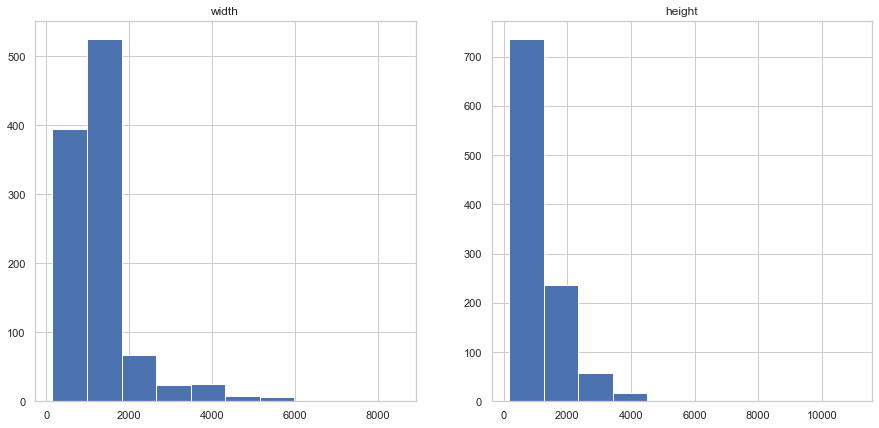

In [66]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.hist(info_imag['width'])
plt.title('width')

plt.subplot(1, 2, 2)
plt.hist(info_imag['height'])
plt.title('height')

In [67]:
info_imag['image'][0]

'Dataset/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'

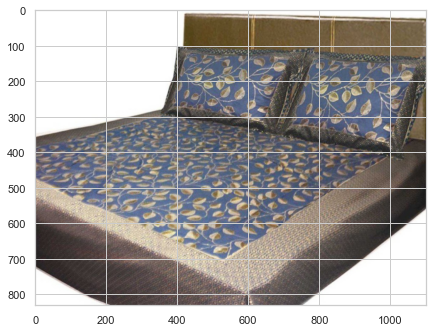

In [68]:
plt.figure(figsize=(7,7))

test = plt.imread(info_imag['image'][3])
plt.imshow(test)


In [69]:
import cv2 

In [70]:
def transform_grayscale(image):
    
    file_dir=os.path.split(image)
    img = cv2.imread(image)
     # Converting image to grayscale
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
    # Applying SIFT detector
    sift = cv2.SIFT_create()
    kp = sift.detect(gray, None)
 
    # Marking the keypoint on the image using circles
    img=cv2.drawKeypoints(gray ,kp ,img ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    
    
    title = 'Dataset/Images_keyPoint/'+file_dir[1]
    cv2.imwrite(title, img)
    
    return title

In [71]:
df_image3 = df_image2.copy()[['uniq_id','image','cat_lvl_1']]

In [72]:
df_image4 =df_image3.copy().iloc[0:500]

In [73]:
df_image4["image_KP"] = df_image4["image"].apply(transform_grayscale)

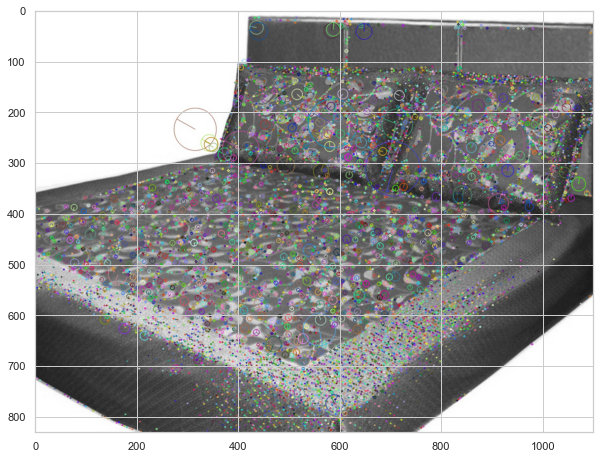

In [74]:
plt.figure(figsize=(10,10))

test = plt.imread(df_image4["image_KP"][3])
plt.imshow(test)

## <font color='blue'> BaG of Features

### Redimension Image

In [209]:
def redim(image):
    
    # Cette fonction sert juste à montrer ce que donne une image
    # redimensionnée sans prendre en compte les proportions.
    # Cele sert juste à illustrer le support de présentation du
    # projet.
    
    img = Image.open(image)
    file_dir=os.path.split(image)
    
    width, height = img.size
    
    new_size = (224, 224)
        
    img.resize(new_size).save("Dataset/Images_redim/"+file_dir[1])
    
    
def df_dossredim(df) :
    df_redim = df.copy()
    for i in df_redim.index :
        splt = df_redim.loc[i].split('/')
        new = 'Dataset/Images_redim/'+splt[2]
        df_redim.loc[i] = new
        
    return df_redim

In [90]:
df_image3['image'].apply(redim)
df_image3_redim = df_dossredim(df_image3['image'])

In [92]:
df_image3_redim

0       Dataset/Images_redim/55b85ea15a1536d46b7190ad6...
1       Dataset/Images_redim/7b72c92c2f6c40268628ec5f1...
2       Dataset/Images_redim/64d5d4a258243731dc7bbb1ee...
3       Dataset/Images_redim/d4684dcdc759dd9cdf4150469...
4       Dataset/Images_redim/6325b6870c54cd47be6ebfbff...
                              ...                        
1045    Dataset/Images_redim/958f54f4c46b53c8a0a9b8167...
1046    Dataset/Images_redim/fd6cbcc22efb6b761bd564c28...
1047    Dataset/Images_redim/5912e037d12774bb73a2048f3...
1048    Dataset/Images_redim/c3edc504d1b4f0ba6224fa53a...
1049    Dataset/Images_redim/f2f027ad6a6df617c9f125173...
Name: image, Length: 1050, dtype: object

### SIFT

In [91]:
descriptors = np.array([])

In [175]:
ls_des = []
ls_invalide=[]
for im in range(len(list(df_image3_redim))) :
    img = cv2.imread(list(df_image3_redim)[im])
    #gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    
    if str(type(des)) != "<class 'NoneType'>":
        ls_des.append((list(df_image3_redim)[im],des))
    else :
        ls_invalide.append(list(df_image3_redim)[im])
        print('PAS DE KEYPOINT POUR L IMAGE : ', list(df_image3_redim)[im])

PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/9743e6d1c9f3180483825fe4d2e97836.jpg


**On ne retrouve pas de keypoint pour l'image 9743e6d1c9f3180483825fe4d2e97836.jpg. <br>**
On le supprime donc de notre base de données **

In [214]:
delete_data = df_image3_redim[df_image3_redim=='Dataset/Images_redim/9743e6d1c9f3180483825fe4d2e97836.jpg'].index[0]

In [216]:
df_image3_redim = df_image3_redim.drop(delete_data)

In [217]:
df_best_textpro = df_best_textpro.drop(delete_data)

In [219]:
descriptors_sift=ls_des[0][1]
a=1
for image_path,descriptor in ls_des[1:]:
    descriptors_sift=np.vstack((descriptors_sift,descriptor))

descriptors_sift_float=descriptors_sift.astype(float)

k=128
voc_sift,variance_sift=kmeans(descriptors_sift_float,k,1)

im_features_sift=np.zeros((len(list(df_image3_redim)),k),"float32")
for i in range(len(list(df_image3_redim))):
    words,distance=vq(ls_des[i][1],voc_sift)
    for w in words:
        im_features_sift[i][w]+=1

stdslr_sift=StandardScaler().fit(im_features_sift)
im_features_sift=stdslr_sift.transform(im_features_sift)

### ORB

In [223]:
orb=cv2.ORB_create()

In [240]:
des_list_orb = list()
ls_invalide =[]

for im in range(len(list(df_image3_redim))) :
    img = cv2.imread(list(df_image3_redim)[im])
    kp=orb.detect(img,None)
    keypoints,descriptor= orb.compute(img, kp)
    
    
    if str(type(descriptor)) != "<class 'NoneType'>":
        des_list_orb.append((list(df_image3_redim)[im],descriptor))
        
    else :
        ls_invalide.append(list(df_image3_redim)[im])
        print('PAS DE KEYPOINT POUR L IMAGE : ', list(df_image3_redim)[im])

PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/f3ad282dac6ef0e30585a49ac67a322b.jpg
PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/c8e2c85eccdc9db55eeb2231385e4f1c.jpg
PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/7c785e9e26092c0b6ed038085e90d89d.jpg
PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/00cbbc837d340fa163d11e169fbdb952.jpg
PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/c5720509a67da707afcb6f4f0282d529.jpg
PAS DE KEYPOINT POUR L IMAGE :  Dataset/Images_redim/e426290a8f57e82680275bb91df91ad1.jpg


Nous avons une liste d'image ne possedant pas de keypoint suivant la méthode orb on les supprime donc

In [241]:
ls_invalide 

['Dataset/Images_redim/f3ad282dac6ef0e30585a49ac67a322b.jpg',
 'Dataset/Images_redim/c8e2c85eccdc9db55eeb2231385e4f1c.jpg',
 'Dataset/Images_redim/7c785e9e26092c0b6ed038085e90d89d.jpg',
 'Dataset/Images_redim/00cbbc837d340fa163d11e169fbdb952.jpg',
 'Dataset/Images_redim/c5720509a67da707afcb6f4f0282d529.jpg',
 'Dataset/Images_redim/e426290a8f57e82680275bb91df91ad1.jpg']

In [243]:
ls_index_inval=[]
for inval in ls_invalide : 
    delete_data = df_image3_redim[df_image3_redim==inval].index[0]
    ls_index_inval.append(delete_data)

In [244]:
ls_index_inval

[327, 354, 723, 724, 835, 838]

In [245]:
for index in ls_index_inval : 
    df_best_textpro = df_best_textpro.drop(index)  # on supprime les images sans keypoint ds notre base avec les features txt
    df_image3_redim = df_image3_redim.drop(index)  # on supprime les images sans keypoint ds notre base d'image
    im_features_sift = np.delete(im_features_sift,
                                 (index), axis = 0) # on les supprime des feature sift 
    

In [250]:
descriptors_orb=des_list_orb[0][1]
for image_path,descriptor in des_list_orb[1:]:
    descriptors_orb=np.vstack((descriptors_orb,descriptor))
    
descriptors_orb_float=descriptors_orb.astype(float)

k=200
voc_orb,variance_orb=kmeans(descriptors_orb_float,k,1)

im_features_orb=np.zeros((len(list(df_image3_redim)),k),"float32")
for i in range(len(list(df_image3_redim))):
    words,distance=vq(des_list_orb[i][1],voc_orb)
    for w in words:
        im_features_orb[i][w]+=1
        
stdslr_orb=StandardScaler().fit(im_features_orb)
im_features_orb=stdslr_orb.transform(im_features_orb)    

### Comparaison ORB et SIFT

SIFT
--------


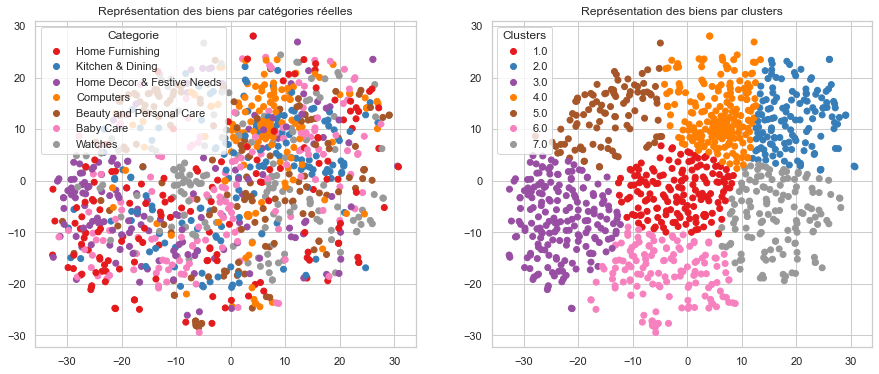

In [260]:
print("SIFT")
print("--------")
X_tsne_sift, labels_sift = ARI_fct2(im_features_sift,df_best_textpro['num_categorie'].values)
TSNE_visu_fct2(X_tsne_sift, df_best_textpro['num_categorie'].values, labels_sift)

ORB
--------


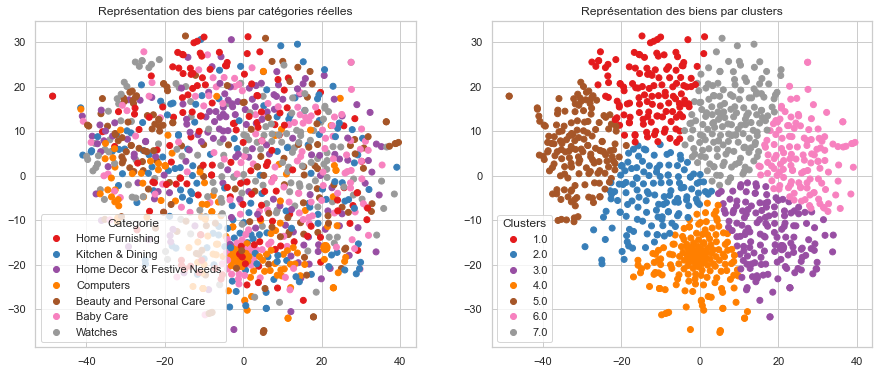

In [259]:
print("ORB")
print("--------")
X_tsne_orb, labels_orb = ARI_fct2(im_features_orb,df_best_textpro['num_categorie'].values)
TSNE_visu_fct2(X_tsne_orb, df_best_textpro['num_categorie'].values, labels_orb)

In [261]:
print('ARI POUR SIFT : ',adjusted_rand_score(df_best_textpro['num_categorie'].values, labels_sift))
print('ACCURENCY POUR SIFT : ',accuracy_score(df_best_textpro['num_categorie'].values, labels_sift),'\n')

print('ARI POUR ORB : ',adjusted_rand_score(df_best_textpro['num_categorie'].values, labels_orb))
print('ACCURENCY POUR ORB : ',accuracy_score(df_best_textpro['num_categorie'].values, labels_orb),'\n')

ARI POUR SIFT :  0.06451532382637136
ACCURENCY POUR SIFT :  0.2809204218600192 

ARI POUR ORB :  0.0296804241598529
ACCURENCY POUR ORB :  0.2339405560882071 



In [387]:
df_comparaison['SIFT']=''
df_comparaison['ORB']=''

In [388]:
df_comparaison['SIFT']['ari']=adjusted_rand_score(df_best_textpro['num_categorie'].values, labels_sift)
df_comparaison['SIFT']['accurency']=accuracy_score(df_best_textpro['num_categorie'].values, labels_sift)

df_comparaison['ORB']['ari']=adjusted_rand_score(df_best_textpro['num_categorie'].values, labels_orb)
df_comparaison['ORB']['accurency']=accuracy_score(df_best_textpro['num_categorie'].values, labels_orb)

In [389]:
df_comparaison

CV    TF-IDF       W2V      BERT       USE       SIFT  \
accurency      0.62  0.721905  0.497143  0.569524  0.613333    0.28092   
ari        0.367824  0.511265  0.277111  0.326547  0.422782  0.0645153   

                 ORB  
accurency   0.233941  
ari        0.0296804

## <font color='blue'> Reseaux de Neuronnes

In [112]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from  keras.utils.image_utils import load_img , img_to_array
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model
import keras

### Preparation Datasets

In [262]:
def df_arrayImage (X):
    new_df=[]
    for i in X.index :


        img = load_img(X.loc[i])  # Charger l'image
        img = img_to_array(img)  # Convertir en tableau numpy
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
        img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

        new_df.append(img)

    new_df = np.array(new_df,dtype=float)

    return new_df

In [263]:
df_image3_redim_CNN = df_arrayImage (df_image3_redim)

### Creation du modèle

In [266]:
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model_CNN = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model_CNN.output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
#predictions = Dense(7, activation='softmax')(x)

x1= keras.layers.Conv2D(512,5,padding='valid')(x)
x2 = keras.layers.Conv2D(512,3,padding='valid')(x1)
x3 = Dense(7, activation='softmax')(x2)
x4 = keras.layers.Flatten()(x3)


# Définir le nouveau modèle
new_model_CNN= Model(inputs=model_CNN.input, outputs=x4)

In [267]:
# Methode fine-tuning partiel 

for layer in new_model_CNN.layers[:5]:
    layer.trainable = False

In [268]:
new_model_CNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### test du modèle

In [279]:
cat_num =  df_best_textpro['num_categorie']-1

In [282]:
X_train, X_test, y_train, y_test = train_test_split(df_image3_redim_CNN, cat_num, test_size=0.33, random_state=42)

In [288]:
# Compiler le modèle  keras.losses.SparseCategoricalCrossentropy
new_model_CNN.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
y_train2 = keras.utils.to_categorical(np.array(y_train))
y_test2 = keras.utils.to_categorical(np.array(y_test))

In [291]:
new_model_CNN.fit(X_train, y_train2)

22/22 [==============================] - 238s 11s/step - loss: 6.3060 - accuracy: 0.5086


In [292]:
prediction_CNN = new_model_CNN.predict(X_test)

11/11 [==============================] - 36s 3s/step


In [293]:
new_prediction_CNN = np.zeros((len(prediction_CNN)))

for i in range(len(new_prediction_CNN)):
    new_prediction_CNN[i] = prediction_CNN[i].argmax()

In [294]:
print('ARI POUR CNN : ', adjusted_rand_score(y_test,new_prediction_CNN))

ARI POUR CNN :  0.34404713937146797


In [390]:
df_comparaison['CNN']=''
df_comparaison['CNN']['ari']=adjusted_rand_score(y_test,new_prediction_CNN)
df_comparaison['CNN']['accurency']=0.5086

In [295]:
#alternatively, you can use cnnModel.get_layer('layername').output for that    
model_intermediate = Model(new_model_CNN.inputs, new_model_CNN.layers[-3].output)

In [296]:
model_intermediate.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [297]:
feature_cnn = model_intermediate.predict(df_image3_redim_CNN)

33/33 [==============================] - 122s 4s/step


In [414]:
feature_cnn_tsne = list()
for i in feature_cnn : 
    feature_cnn_tsne.append(i[0][0])
feature_cnn_tsne=np.array(feature_cnn_tsne)

cnn
--------


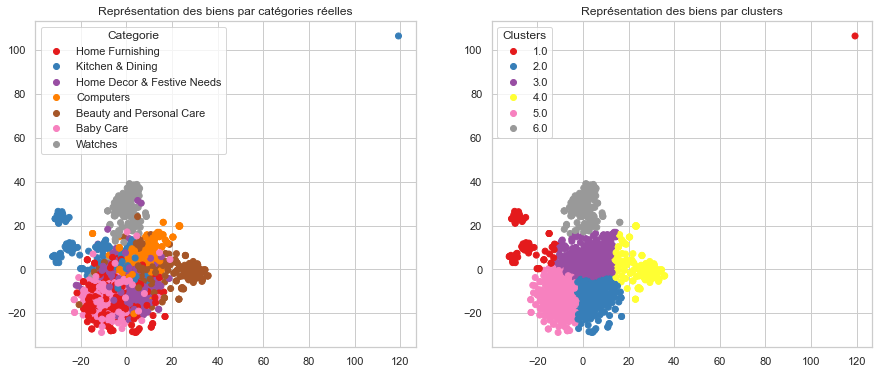

In [609]:
print("cnn")
print("--------")
X_tsne_cnn, labels_cnn = ARI_fct2(feature_cnn_tsne,df_best_textpro['num_categorie'].values-1)
TSNE_visu_fct2(X_tsne_cnn, df_best_textpro['num_categorie'].values-1, labels_cnn)

# Association Text & Image Processing

## <font color='blue'> Pre-traitement

In [439]:
df_txt_img = df_best_textpro.copy()

In [440]:
df_txt_img['CNN']=''
df_txt_img['CNN'].astype(object)

0        
1        
2        
3        
4        
       ..
1045     
1046     
1047     
1048     
1049     
Name: CNN, Length: 1043, dtype: object

In [441]:
for i in range(len(df_txt_img.index)) :
    index = df_txt_img.index[i]
    df_txt_img['CNN'][index]=feature_cnn[i][0][0]

In [442]:
X_train, X_test, y_train, y_test = train_test_split(df_txt_img[['USE','TF-IDF','CNN']],
                                                    df_txt_img['num_categorie'], test_size=0.33, 
                                                    random_state=42)

## <font color='blue'> Modelisation

In [443]:
def concat_array (df,txt,img):
    ls_arr=[]
    for i in df.index:
        if txt == 'TF-IDF':
            arr=np.concatenate((df[txt][i].toarray(),df[img][i]),axis=None)
            ls_arr.append(arr)
        else : 
            arr=np.concatenate((df[txt][i],df[img][i]),axis=None)
            ls_arr.append(arr)
    
    return np.array(ls_arr)

In [590]:
def calcul_accuracy(y_test,predict) :
    
    
        df=pd.DataFrame(np.array([y_test.values,predict]).T,index=y_test.index,columns=['lab_reel','lab_pred'])
        df['change'] = np.zeros((len(df),1))
    
        dict_lab=dict()
    
        for i in set(predict) :
        
            lab_change = df[df['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index[0]

            if lab_change in dict_lab.values():
                n = df[df['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index
                
                for j in range(1,len(n)):
                    lab_change = df[df['lab_pred']==i]['lab_reel'].value_counts(ascending=False).index[j]
                    if lab_change not in dict_lab.values() :
                        break 

            dict_lab[i]=lab_change
        
        for i in dict_lab.keys() :
            df.loc[df['lab_pred'] ==  i, 'change'] =dict_lab[i]
            
            
        accuracy = accuracy_score(y_test,df['change'])

        return accuracy 

In [591]:
for i in ['TF-IDF','USE'] : 
    for j in ['CNN'] : 
    
        train_final = concat_array (X_train,i,j)
        test_final = concat_array (X_test,i,j)        
        
        stdslr_final=StandardScaler().fit(train_final)
        train_final=stdslr_final.transform(train_final)
        test_final=stdslr_final.transform(test_final)
        
        kmeans_f = KMeans(n_clusters=7, n_init=100, random_state=42)
        kmeans_f.fit(train_final)
    
        predict_final = kmeans_f.predict(test_final)
    
        acc = calcul_accuracy(y_test,predict_final)
        ari = adjusted_rand_score(y_test,predict_final)
    
        print('Association : ',i.upper(),' & ', j.upper())
        print('accurency = ',acc, ' & ari = ',ari)
        print( '_________________________________________________________________\n')
        asos = i.upper()+' + '+ j.upper()
        df_comparaison[asos]=''
        df_comparaison[asos]['ari']=ari
        df_comparaison[asos]['accurency']=acc

Association :  TF-IDF  &  CNN
accurency =  0.28695652173913044  & ari =  0.05617376546273671
_________________________________________________________________

Association :  USE  &  CNN
accurency =  0.5507246376811594  & ari =  0.30086949913609606
_________________________________________________________________



In [479]:
df_comparaison2 = df_comparaison.T
df_comparaison2['method'] = list(df_comparaison2.index)

In [576]:
df_comparaison2

accurency        ari        method
CV                0.62   0.367824            CV
TF-IDF        0.721905   0.511265        TF-IDF
W2V           0.497143   0.277111           W2V
BERT          0.569524   0.326547          BERT
USE           0.613333   0.422782           USE
SIFT           0.28092  0.0645153          SIFT
ORB           0.233941  0.0296804           ORB
CNN             0.5086   0.344047           CNN
TF-IDF + CNN  0.286957  0.0561738  TF-IDF + CNN
USE + CNN     0.550725   0.300869     USE + CNN

<AxesSubplot:xlabel='method'>

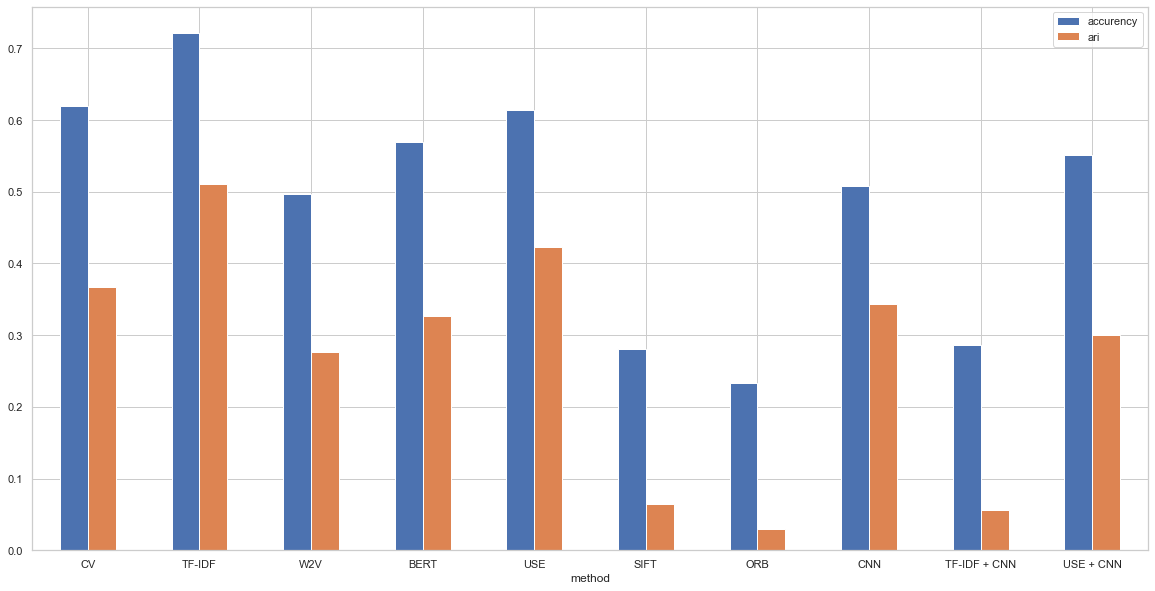

In [481]:
df_comparaison2.plot.bar(x='method', y=['accurency','ari'], rot=0,figsize=(20,10))

## <font color='blue'> Reduction de dimension 

In [327]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import decomposition
from sklearn.decomposition import PCA


In [528]:
def info_pca(pca):
    plt.figure(figsize=(8,4))
    plt.axhline(y=95,color='red')
    plt.axhline(y=85,color='green')
    
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
    var_rat = pca.explained_variance_ratio_.cumsum()
    nb_var=0
    for i in range(len(var_rat)) :
        if var_rat[i] >= 0.95 :
            nb_var=i            
            break

    return nb_var

In [747]:
def redu_dim(X_train,X_test,y_test,i,j) : 
    
    print('Association APRES ACP: ',i.upper(),' & ', j.upper())

    train_final = concat_array (X_train,i,j)
    test_final = concat_array (X_test,i,j)

    print('AVANT ACP, nb de composante = ',min(train_final.shape[0],train_final.shape[1]))
    pca = PCA(random_state=1)
    pca.fit(train_final)
    nb_var = info_pca(pca) 
    
    train_pca = pca.transform(train_final)[:, :nb_var]
    test_pca = pca.transform(test_final)[:, :nb_var]
    print(train_pca.shape)
    print('APRES ACP, nb de var = ',nb_var)
   
    kmeans_Pca = KMeans(n_clusters=7, n_init=100, random_state=42)
    kmeans_Pca.fit(train_pca)
    
    predict_final = kmeans_Pca.predict(test_pca)
    
    acc = calcul_accuracy(y_test,kmeans_Pca.predict(test_pca))
    ari = adjusted_rand_score(y_test,kmeans_Pca.predict(test_pca))
    
    print('accuracy = ',acc, ' & ari = ',ari)
    print( '_________________________________________________________________\n')
    
    

Association APRES ACP:  TF-IDF  &  CNN
AVANT ACP, nb de composante =  698


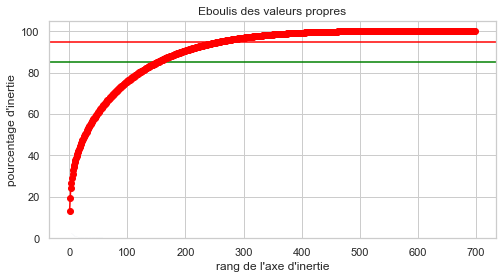

(698,)
(698, 260)
APRES ACP, nb de var =  260
accuracy =  0.4579710144927536  & ari =  0.19619400263424036
_________________________________________________________________



In [748]:
test = redu_dim(X_train,X_test,y_test,'TF-IDF','CNN')

Association APRES ACP:  USE  &  CNN
AVANT ACP, nb de composante =  698


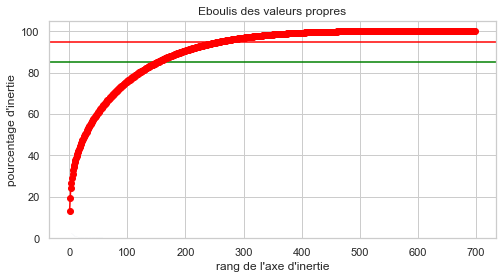

(698,)
(698, 260)
APRES ACP, nb de var =  260
accuracy =  0.4579710144927536  & ari =  0.19619400263424036
_________________________________________________________________



In [749]:
redu_dim(X_train,X_test,y_test,'USE','CNN')